# Text Data Mining From URL and Analysing :-

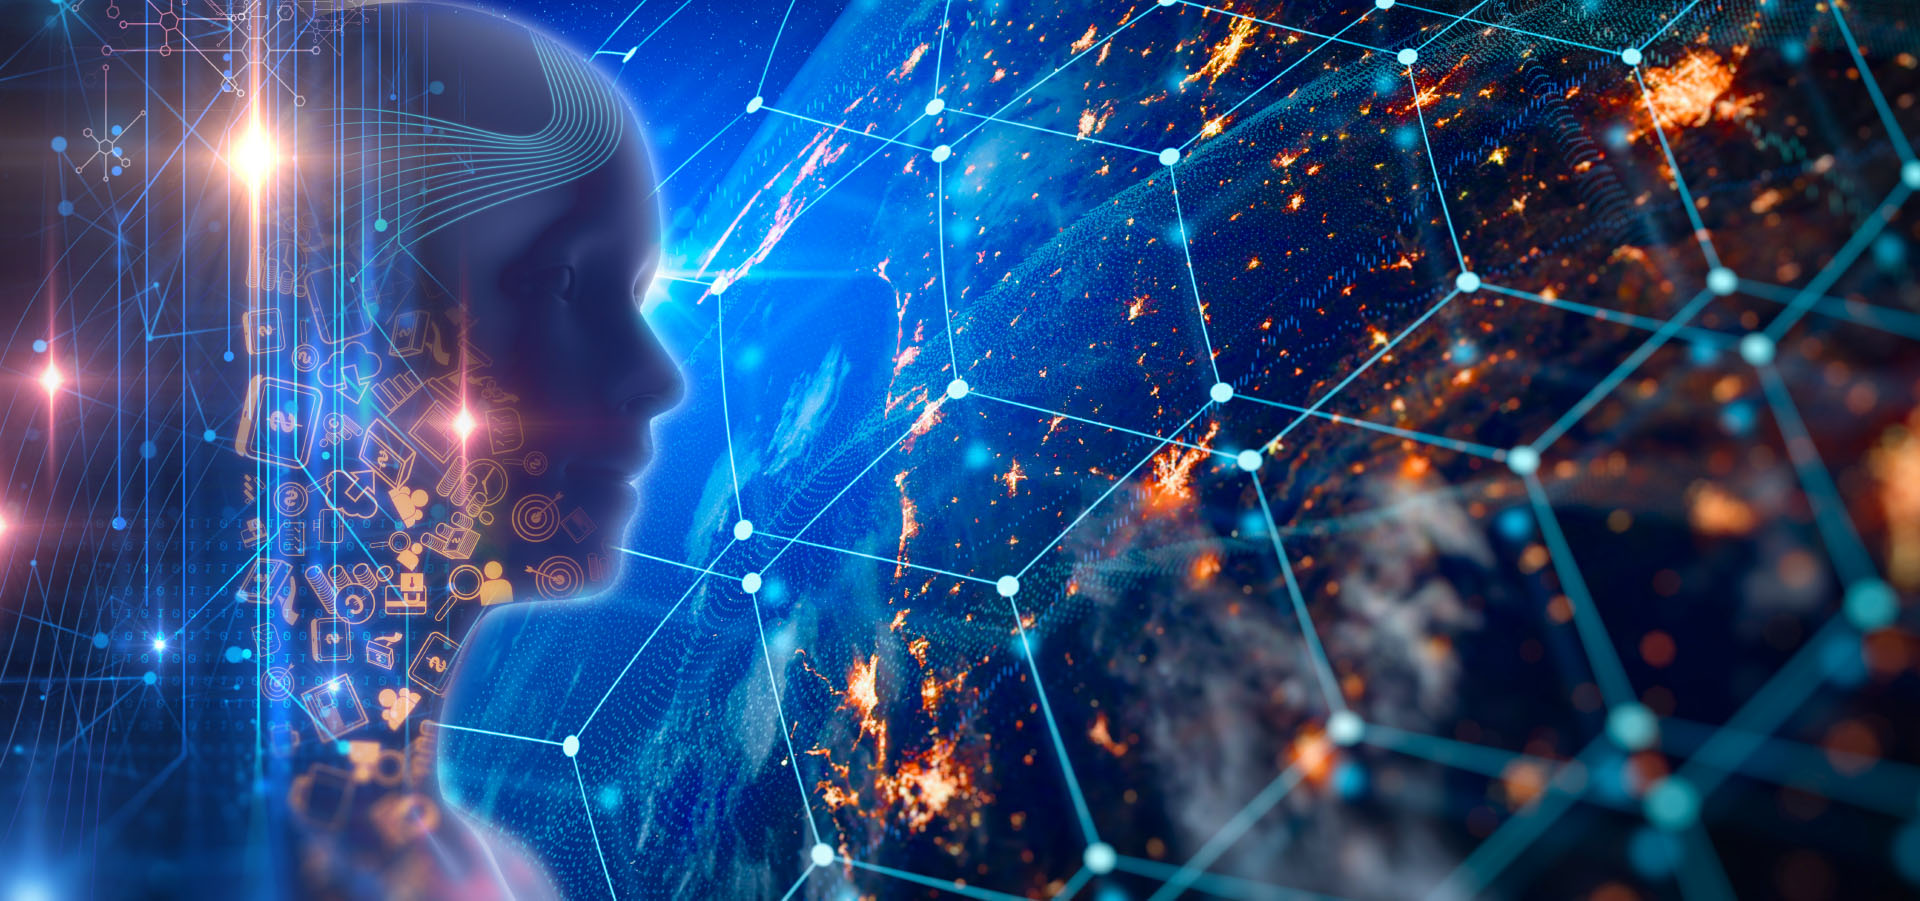

In [1]:
from IPython import display
display.Image("C:\\Users\\admin\\Desktop\\Pic\\banner-rpaaas.jpg")

In [2]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install optimal-data-selector

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install english-syllable

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import optimal_data_selector
from textblob import TextBlob
import string
import english_syllable
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df=pd.read_excel("C:\\Users\\admin\\Downloads\\Input.xlsx")
df

,URL_ID,URL
0,123.0,https://insights.blackcoffer.com/rise-of-telem...
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...
4,432.0,https://insights.blackcoffer.com/rise-of-telem...
...,...,...
109,50921.0,https://insights.blackcoffer.com/coronavirus-i...
110,51382.8,https://insights.blackcoffer.com/coronavirus-i...
111,51844.6,https://insights.blackcoffer.com/what-are-the-...
112,52306.4,https://insights.blackcoffer.com/marketing-dri...


In [7]:
df.shape

(114, 2)

In [8]:
df.columns

Index(['URL_ID', 'URL'], dtype='object')

In [9]:
df.isnull().sum()

URL_ID    0
URL       0
dtype: int64

## Mining

In [10]:
rev=[]
ss=0
dd1=0
for i in df['URL'].values:
    try:
        req=requests.get(i)
        sou=BeautifulSoup(req.content,'html.parser')
        rev.append(sou.find('div',class_='td-post-content').get_text())
    except:
        df[df['URL']==i]=np.nan      
df.dropna(inplace=True)
df['text']=rev
df.index=range(0,len(df))
df

,URL_ID,URL,text
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"\nTelemedicine, the use of technology to diagn..."
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"\nThe rise of e-health, or the use of electron..."
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,\n\n2020 was the year the world was ravaged by...
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac..."
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac..."
...,...,...,...
107,50921.0,https://insights.blackcoffer.com/coronavirus-i...,\nBefore jumping on the topic I would like to ...
108,51382.8,https://insights.blackcoffer.com/coronavirus-i...,\nAs the coronavirus spreads around the world ...
109,51844.6,https://insights.blackcoffer.com/what-are-the-...,"\nFrom Alibaba to Ping An and Google to Ford, ..."
110,52306.4,https://insights.blackcoffer.com/marketing-dri...,"\nWhen\nthe British ruled India, many Indians\..."


In [11]:
df.isnull().sum()

URL_ID    0
URL       0
text      0
dtype: int64

## Featching all the positive and nagative words
### Positive words

In [12]:
p_file= open("C:\\Users\\admin\\Downloads\\positive-words.txt",'r')
p_word = p_file.readlines()
i1=[]
for j in p_word:
    i1.append(j.replace('\n',''))
i1

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

### Negative Words 

In [13]:
n_file = open("C:\\Users\\admin\\Downloads\\negative-words.txt",'r')
n_word = n_file.readlines()
i2=[]
for i in n_word:
    i2.append(i.replace('\n',''))
    
i2        

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


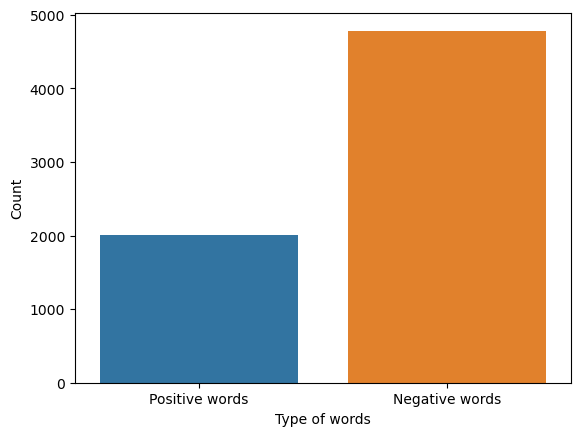

In [14]:
P1=[]
for i in range(0,len(i1)):
    P1.append('Positive words')
for i4 in range(0,len(i2)):
    P1.append('Negative words')
sns.barplot(x=['Positive words','Negative words'],y=[P1.count('Positive words'),P1.count('Negative words')])
plt.xlabel('Type of words')
plt.ylabel('Count')
plt.show()

## Positive & Negative Score 

In [15]:
from optimal_data_selector.text import word_tokenizer
from collections import Counter

punc=["!","'",'"',"#","$","%","&","(",")","*","+",",","-",".","/",":",";","<","=",">","?","@","[","]","^","_","`","{","}","|","~","\\"]
def p_words(text,type_):
    positive=[]
    total=[]
    text1=word_tokenizer(text=text,output_case='lower',del_words=punc)
    if type_=='positive':
        for word in text1:
            if word in i1:
                positive.append(word)
    elif type_ == 'negative':
        for word in text1:
            if word in i2:
                positive.append(word)
    con=Counter(positive)
    for c in con.values():
        total.append(c)
    score=(sum(total)/len(text1))   
    return score
df['POSITIVE SCORE'] = df['text'].apply(lambda text:p_words(text,type_='positive'))
df['NEGATIVE SCORE'] = df['text'].apply(lambda text:p_words(text,type_='negative'))
df

,URL_ID,URL,text,POSITIVE SCORE,NEGATIVE SCORE
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"\nTelemedicine, the use of technology to diagn...",0.052381,0.014286
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"\nThe rise of e-health, or the use of electron...",0.065600,0.020800
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,\n\n2020 was the year the world was ravaged by...,0.023445,0.024346
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480
...,...,...,...,...,...
107,50921.0,https://insights.blackcoffer.com/coronavirus-i...,\nBefore jumping on the topic I would like to ...,0.011429,0.041429
108,51382.8,https://insights.blackcoffer.com/coronavirus-i...,\nAs the coronavirus spreads around the world ...,0.015716,0.038999
109,51844.6,https://insights.blackcoffer.com/what-are-the-...,"\nFrom Alibaba to Ping An and Google to Ford, ...",0.056465,0.018634
110,52306.4,https://insights.blackcoffer.com/marketing-dri...,"\nWhen\nthe British ruled India, many Indians\...",0.025748,0.014614


<AxesSubplot:xlabel='Column', ylabel='Value'>

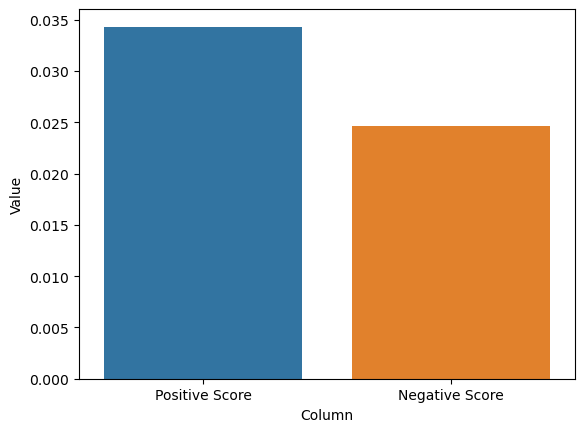

In [16]:
bar_df=pd.DataFrame({'Column':['Positive Score','Negative Score'],
                     'Value':[df['POSITIVE SCORE'].mean(),
                              df['NEGATIVE SCORE'].mean()]})
sns.barplot(x=bar_df['Column'],y=bar_df['Value'])

## Polarity score and Subjectivity score

In [17]:
df['POLARITY SCORE']=df['text'].apply(lambda Text:TextBlob(Text).sentiment[0])
df['SUBJECTIVITY SCORE'] = df['text'].apply(lambda text:TextBlob(text).sentiment[1])
df

,URL_ID,URL,text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"\nTelemedicine, the use of technology to diagn...",0.052381,0.014286,0.136034,0.437280
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"\nThe rise of e-health, or the use of electron...",0.065600,0.020800,0.111801,0.615704
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,\n\n2020 was the year the world was ravaged by...,0.023445,0.024346,0.086835,0.459666
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624
...,...,...,...,...,...,...,...
107,50921.0,https://insights.blackcoffer.com/coronavirus-i...,\nBefore jumping on the topic I would like to ...,0.011429,0.041429,0.077797,0.432445
108,51382.8,https://insights.blackcoffer.com/coronavirus-i...,\nAs the coronavirus spreads around the world ...,0.015716,0.038999,0.013231,0.401288
109,51844.6,https://insights.blackcoffer.com/what-are-the-...,"\nFrom Alibaba to Ping An and Google to Ford, ...",0.056465,0.018634,0.133756,0.451958
110,52306.4,https://insights.blackcoffer.com/marketing-dri...,"\nWhen\nthe British ruled India, many Indians\...",0.025748,0.014614,0.073452,0.434461


## AVG WORD PER SENTENCE  

In [18]:
def sent_(text):
    s1=[]
    wo=[]
    final_wo=[]
    for sent in text.split('.'):
        s1.append(sent)
        tok2=word_tokenizer(sent,del_words=punc)
        for word in tok2:
            wo.append(word)
            final_wo.append(len(wo))
            wo.clear()
    return sum(final_wo)/len(s1)
df['AVG WORDS PER SENTENCE'] = df['text'].apply(lambda text:sent_(text))
df
        

,URL_ID,URL,text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG WORDS PER SENTENCE
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"\nTelemedicine, the use of technology to diagn...",0.052381,0.014286,0.136034,0.437280,19.310345
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"\nThe rise of e-health, or the use of electron...",0.065600,0.020800,0.111801,0.615704,25.000000
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,\n\n2020 was the year the world was ravaged by...,0.023445,0.024346,0.086835,0.459666,14.986486
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085
...,...,...,...,...,...,...,...,...
107,50921.0,https://insights.blackcoffer.com/coronavirus-i...,\nBefore jumping on the topic I would like to ...,0.011429,0.041429,0.077797,0.432445,21.212121
108,51382.8,https://insights.blackcoffer.com/coronavirus-i...,\nAs the coronavirus spreads around the world ...,0.015716,0.038999,0.013231,0.401288,33.686275
109,51844.6,https://insights.blackcoffer.com/what-are-the-...,"\nFrom Alibaba to Ping An and Google to Ford, ...",0.056465,0.018634,0.133756,0.451958,24.597222
110,52306.4,https://insights.blackcoffer.com/marketing-dri...,"\nWhen\nthe British ruled India, many Indians\...",0.025748,0.014614,0.073452,0.434461,22.453125


## AVG SENTENCE LENGTH 

In [19]:
def sen_len(text):
    sen01=[]
    sen01_len=[]
    for l in text.split('.'):
        sen01.append(l)
        sen01_len.append(len(l))
    return  sum(sen01_len)/len(sen01)
df['AVG SENTENCE LENGTH'] = df['text'].apply(lambda l:sen_len(l)) 
df

,URL_ID,URL,text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG WORDS PER SENTENCE,AVG SENTENCE LENGTH
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"\nTelemedicine, the use of technology to diagn...",0.052381,0.014286,0.136034,0.437280,19.310345,127.459770
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"\nThe rise of e-health, or the use of electron...",0.065600,0.020800,0.111801,0.615704,25.000000,159.560000
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,\n\n2020 was the year the world was ravaged by...,0.023445,0.024346,0.086835,0.459666,14.986486,92.986486
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220
...,...,...,...,...,...,...,...,...,...
107,50921.0,https://insights.blackcoffer.com/coronavirus-i...,\nBefore jumping on the topic I would like to ...,0.011429,0.041429,0.077797,0.432445,21.212121,132.757576
108,51382.8,https://insights.blackcoffer.com/coronavirus-i...,\nAs the coronavirus spreads around the world ...,0.015716,0.038999,0.013231,0.401288,33.686275,206.784314
109,51844.6,https://insights.blackcoffer.com/what-are-the-...,"\nFrom Alibaba to Ping An and Google to Ford, ...",0.056465,0.018634,0.133756,0.451958,24.597222,153.375000
110,52306.4,https://insights.blackcoffer.com/marketing-dri...,"\nWhen\nthe British ruled India, many Indians\...",0.025748,0.014614,0.073452,0.434461,22.453125,135.171875


## Word Count

In [20]:
def word_count(text):
    woc=word_tokenizer(text,del_words=punc)
    return len(woc)
df['WORD COUNT'] = df['text'].apply(lambda text:word_count(text))
df

,URL_ID,URL,text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG WORDS PER SENTENCE,AVG SENTENCE LENGTH,WORD COUNT
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"\nTelemedicine, the use of technology to diagn...",0.052381,0.014286,0.136034,0.437280,19.310345,127.459770,1680
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"\nThe rise of e-health, or the use of electron...",0.065600,0.020800,0.111801,0.615704,25.000000,159.560000,625
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,\n\n2020 was the year the world was ravaged by...,0.023445,0.024346,0.086835,0.459666,14.986486,92.986486,1109
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257
...,...,...,...,...,...,...,...,...,...,...
107,50921.0,https://insights.blackcoffer.com/coronavirus-i...,\nBefore jumping on the topic I would like to ...,0.011429,0.041429,0.077797,0.432445,21.212121,132.757576,700
108,51382.8,https://insights.blackcoffer.com/coronavirus-i...,\nAs the coronavirus spreads around the world ...,0.015716,0.038999,0.013231,0.401288,33.686275,206.784314,1718
109,51844.6,https://insights.blackcoffer.com/what-are-the-...,"\nFrom Alibaba to Ping An and Google to Ford, ...",0.056465,0.018634,0.133756,0.451958,24.597222,153.375000,1771
110,52306.4,https://insights.blackcoffer.com/marketing-dri...,"\nWhen\nthe British ruled India, many Indians\...",0.025748,0.014614,0.073452,0.434461,22.453125,135.171875,1437


## SYLLABLE PER WORD 

In [21]:
def syllable(text):
    sy=english_syllable.count(text)
    total_word = word_tokenizer(text,del_words=punc)
    return sy/len(total_word)
df['SYLLABLE PER WORD'] = df['text'].apply(lambda text:syllable(text))
df

,URL_ID,URL,text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG WORDS PER SENTENCE,AVG SENTENCE LENGTH,WORD COUNT,SYLLABLE PER WORD
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"\nTelemedicine, the use of technology to diagn...",0.052381,0.014286,0.136034,0.437280,19.310345,127.459770,1680,2.055357
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"\nThe rise of e-health, or the use of electron...",0.065600,0.020800,0.111801,0.615704,25.000000,159.560000,625,1.976000
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,\n\n2020 was the year the world was ravaged by...,0.023445,0.024346,0.086835,0.459666,14.986486,92.986486,1109,1.806132
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257,1.900557
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257,1.900557
...,...,...,...,...,...,...,...,...,...,...,...
107,50921.0,https://insights.blackcoffer.com/coronavirus-i...,\nBefore jumping on the topic I would like to ...,0.011429,0.041429,0.077797,0.432445,21.212121,132.757576,700,1.771429
108,51382.8,https://insights.blackcoffer.com/coronavirus-i...,\nAs the coronavirus spreads around the world ...,0.015716,0.038999,0.013231,0.401288,33.686275,206.784314,1718,1.767753
109,51844.6,https://insights.blackcoffer.com/what-are-the-...,"\nFrom Alibaba to Ping An and Google to Ford, ...",0.056465,0.018634,0.133756,0.451958,24.597222,153.375000,1771,1.818182
110,52306.4,https://insights.blackcoffer.com/marketing-dri...,"\nWhen\nthe British ruled India, many Indians\...",0.025748,0.014614,0.073452,0.434461,22.453125,135.171875,1437,1.728601


## PERSONAL PRONOUNS


In [22]:
pro=['he','she','i','me','we','us','him','her','it','they','them','you']
pt=0
for p in pro:
    pro.extend([p.capitalize()])
    pt+=1
    if pt == 12:
        break
def pronounes(text):
    pro_N=[]
    con_pro=word_tokenizer(text)
    for i in con_pro:
        if i in pro:
            pro_N.append(i)
    return len(pro_N)
df['PERSONAL PRONOUNS']=df['text'].apply(lambda text:pronounes(text))
df

,URL_ID,URL,text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG WORDS PER SENTENCE,AVG SENTENCE LENGTH,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"\nTelemedicine, the use of technology to diagn...",0.052381,0.014286,0.136034,0.437280,19.310345,127.459770,1680,2.055357,27
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"\nThe rise of e-health, or the use of electron...",0.065600,0.020800,0.111801,0.615704,25.000000,159.560000,625,1.976000,16
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,\n\n2020 was the year the world was ravaged by...,0.023445,0.024346,0.086835,0.459666,14.986486,92.986486,1109,1.806132,12
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257,1.900557,17
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257,1.900557,17
...,...,...,...,...,...,...,...,...,...,...,...,...
107,50921.0,https://insights.blackcoffer.com/coronavirus-i...,\nBefore jumping on the topic I would like to ...,0.011429,0.041429,0.077797,0.432445,21.212121,132.757576,700,1.771429,3
108,51382.8,https://insights.blackcoffer.com/coronavirus-i...,\nAs the coronavirus spreads around the world ...,0.015716,0.038999,0.013231,0.401288,33.686275,206.784314,1718,1.767753,5
109,51844.6,https://insights.blackcoffer.com/what-are-the-...,"\nFrom Alibaba to Ping An and Google to Ford, ...",0.056465,0.018634,0.133756,0.451958,24.597222,153.375000,1771,1.818182,25
110,52306.4,https://insights.blackcoffer.com/marketing-dri...,"\nWhen\nthe British ruled India, many Indians\...",0.025748,0.014614,0.073452,0.434461,22.453125,135.171875,1437,1.728601,39


## AVG WORD LENGTH 

In [23]:
def word_len(text):
    len_of_word=[]
    word2=word_tokenizer(text,del_words=punc)
    for ww1 in word2:
        len_of_word.append(len(ww1))
    return sum(len_of_word)/len(word2)
df['AVG WORD LENGTH']=df['text'].apply(lambda text:word_len(text))
df
        
    

,URL_ID,URL,text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG WORDS PER SENTENCE,AVG SENTENCE LENGTH,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"\nTelemedicine, the use of technology to diagn...",0.052381,0.014286,0.136034,0.437280,19.310345,127.459770,1680,2.055357,27,5.548810
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"\nThe rise of e-health, or the use of electron...",0.065600,0.020800,0.111801,0.615704,25.000000,159.560000,625,1.976000,16,5.334400
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,\n\n2020 was the year the world was ravaged by...,0.023445,0.024346,0.086835,0.459666,14.986486,92.986486,1109,1.806132,12,5.147881
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257,1.900557,17,5.404932
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257,1.900557,17,5.404932
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,50921.0,https://insights.blackcoffer.com/coronavirus-i...,\nBefore jumping on the topic I would like to ...,0.011429,0.041429,0.077797,0.432445,21.212121,132.757576,700,1.771429,3,5.130000
108,51382.8,https://insights.blackcoffer.com/coronavirus-i...,\nAs the coronavirus spreads around the world ...,0.015716,0.038999,0.013231,0.401288,33.686275,206.784314,1718,1.767753,5,5.087311
109,51844.6,https://insights.blackcoffer.com/what-are-the-...,"\nFrom Alibaba to Ping An and Google to Ford, ...",0.056465,0.018634,0.133756,0.451958,24.597222,153.375000,1771,1.818182,25,5.157538
110,52306.4,https://insights.blackcoffer.com/marketing-dri...,"\nWhen\nthe British ruled India, many Indians\...",0.025748,0.014614,0.073452,0.434461,22.453125,135.171875,1437,1.728601,39,4.921364


##  Percentage of Complex words

In [24]:
def per_complex(text):
    comp_word=[]
    p_wo=word_tokenizer(text,del_words=punc)
    for pw in p_wo:
        if english_syllable.count(pw) >2:
            comp_word.append(pw)
    return (len(comp_word)/len(p_wo))*100
df['PARCENTAGE OF COMPLEX WORD']=df['text'].apply(lambda text:per_complex(text))
df
            

,URL_ID,URL,text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG WORDS PER SENTENCE,AVG SENTENCE LENGTH,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH,PARCENTAGE OF COMPLEX WORD
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"\nTelemedicine, the use of technology to diagn...",0.052381,0.014286,0.136034,0.437280,19.310345,127.459770,1680,2.055357,27,5.548810,21.726190
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"\nThe rise of e-health, or the use of electron...",0.065600,0.020800,0.111801,0.615704,25.000000,159.560000,625,1.976000,16,5.334400,23.200000
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,\n\n2020 was the year the world was ravaged by...,0.023445,0.024346,0.086835,0.459666,14.986486,92.986486,1109,1.806132,12,5.147881,20.919748
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257,1.900557,17,5.404932,22.593477
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257,1.900557,17,5.404932,22.593477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,50921.0,https://insights.blackcoffer.com/coronavirus-i...,\nBefore jumping on the topic I would like to ...,0.011429,0.041429,0.077797,0.432445,21.212121,132.757576,700,1.771429,3,5.130000,19.428571
108,51382.8,https://insights.blackcoffer.com/coronavirus-i...,\nAs the coronavirus spreads around the world ...,0.015716,0.038999,0.013231,0.401288,33.686275,206.784314,1718,1.767753,5,5.087311,18.160652
109,51844.6,https://insights.blackcoffer.com/what-are-the-...,"\nFrom Alibaba to Ping An and Google to Ford, ...",0.056465,0.018634,0.133756,0.451958,24.597222,153.375000,1771,1.818182,25,5.157538,18.972332
110,52306.4,https://insights.blackcoffer.com/marketing-dri...,"\nWhen\nthe British ruled India, many Indians\...",0.025748,0.014614,0.073452,0.434461,22.453125,135.171875,1437,1.728601,39,4.921364,18.302018


## Count of Complex words

In [25]:
def complex_count(text):
    con3=[]
    c_wo=word_tokenizer(text)
    for d in c_wo:
        if english_syllable.count(d)>2:
            con3.append(d)
    return len(con3)
df['COMPLEX WORD COUNT'] = df['text'].apply(lambda text:complex_count(text))
df

,URL_ID,URL,text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG WORDS PER SENTENCE,AVG SENTENCE LENGTH,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH,PARCENTAGE OF COMPLEX WORD,COMPLEX WORD COUNT
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"\nTelemedicine, the use of technology to diagn...",0.052381,0.014286,0.136034,0.437280,19.310345,127.459770,1680,2.055357,27,5.548810,21.726190,365
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"\nThe rise of e-health, or the use of electron...",0.065600,0.020800,0.111801,0.615704,25.000000,159.560000,625,1.976000,16,5.334400,23.200000,145
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,\n\n2020 was the year the world was ravaged by...,0.023445,0.024346,0.086835,0.459666,14.986486,92.986486,1109,1.806132,12,5.147881,20.919748,232
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257,1.900557,17,5.404932,22.593477,284
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257,1.900557,17,5.404932,22.593477,284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,50921.0,https://insights.blackcoffer.com/coronavirus-i...,\nBefore jumping on the topic I would like to ...,0.011429,0.041429,0.077797,0.432445,21.212121,132.757576,700,1.771429,3,5.130000,19.428571,136
108,51382.8,https://insights.blackcoffer.com/coronavirus-i...,\nAs the coronavirus spreads around the world ...,0.015716,0.038999,0.013231,0.401288,33.686275,206.784314,1718,1.767753,5,5.087311,18.160652,312
109,51844.6,https://insights.blackcoffer.com/what-are-the-...,"\nFrom Alibaba to Ping An and Google to Ford, ...",0.056465,0.018634,0.133756,0.451958,24.597222,153.375000,1771,1.818182,25,5.157538,18.972332,336
110,52306.4,https://insights.blackcoffer.com/marketing-dri...,"\nWhen\nthe British ruled India, many Indians\...",0.025748,0.014614,0.073452,0.434461,22.453125,135.171875,1437,1.728601,39,4.921364,18.302018,263


## Fog index 

In [26]:
df['FOG INDEX'] = 0.4*(df['AVG WORDS PER SENTENCE']+df['PARCENTAGE OF COMPLEX WORD'])
df

,URL_ID,URL,text,POSITIVE SCORE,NEGATIVE SCORE,POLARITY SCORE,SUBJECTIVITY SCORE,AVG WORDS PER SENTENCE,AVG SENTENCE LENGTH,WORD COUNT,SYLLABLE PER WORD,PERSONAL PRONOUNS,AVG WORD LENGTH,PARCENTAGE OF COMPLEX WORD,COMPLEX WORD COUNT,FOG INDEX
0,123.0,https://insights.blackcoffer.com/rise-of-telem...,"\nTelemedicine, the use of technology to diagn...",0.052381,0.014286,0.136034,0.437280,19.310345,127.459770,1680,2.055357,27,5.548810,21.726190,365,16.414614
1,321.0,https://insights.blackcoffer.com/rise-of-e-hea...,"\nThe rise of e-health, or the use of electron...",0.065600,0.020800,0.111801,0.615704,25.000000,159.560000,625,1.976000,16,5.334400,23.200000,145,19.280000
2,2345.0,https://insights.blackcoffer.com/rise-of-e-hea...,\n\n2020 was the year the world was ravaged by...,0.023445,0.024346,0.086835,0.459666,14.986486,92.986486,1109,1.806132,12,5.147881,20.919748,232,14.362494
3,4321.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257,1.900557,17,5.404932,22.593477,284,17.559425
4,432.0,https://insights.blackcoffer.com/rise-of-telem...,"\n“More gains on quality, affordability and ac...",0.035004,0.021480,0.139706,0.385624,21.305085,137.593220,1257,1.900557,17,5.404932,22.593477,284,17.559425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,50921.0,https://insights.blackcoffer.com/coronavirus-i...,\nBefore jumping on the topic I would like to ...,0.011429,0.041429,0.077797,0.432445,21.212121,132.757576,700,1.771429,3,5.130000,19.428571,136,16.256277
108,51382.8,https://insights.blackcoffer.com/coronavirus-i...,\nAs the coronavirus spreads around the world ...,0.015716,0.038999,0.013231,0.401288,33.686275,206.784314,1718,1.767753,5,5.087311,18.160652,312,20.738771
109,51844.6,https://insights.blackcoffer.com/what-are-the-...,"\nFrom Alibaba to Ping An and Google to Ford, ...",0.056465,0.018634,0.133756,0.451958,24.597222,153.375000,1771,1.818182,25,5.157538,18.972332,336,17.427822
110,52306.4,https://insights.blackcoffer.com/marketing-dri...,"\nWhen\nthe British ruled India, many Indians\...",0.025748,0.014614,0.073452,0.434461,22.453125,135.171875,1437,1.728601,39,4.921364,18.302018,263,16.302057


In [27]:
df.columns

Index(['URL_ID', 'URL', 'text', 'POSITIVE SCORE', 'NEGATIVE SCORE',
       'POLARITY SCORE', 'SUBJECTIVITY SCORE', 'AVG WORDS PER SENTENCE',
       'AVG SENTENCE LENGTH', 'WORD COUNT', 'SYLLABLE PER WORD',
       'PERSONAL PRONOUNS', 'AVG WORD LENGTH', 'PARCENTAGE OF COMPLEX WORD',
       'COMPLEX WORD COUNT', 'FOG INDEX'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   URL_ID                      112 non-null    float64
 1   URL                         112 non-null    object 
 2   text                        112 non-null    object 
 3   POSITIVE SCORE              112 non-null    float64
 4   NEGATIVE SCORE              112 non-null    float64
 5   POLARITY SCORE              112 non-null    float64
 6   SUBJECTIVITY SCORE          112 non-null    float64
 7   AVG WORDS PER SENTENCE      112 non-null    float64
 8   AVG SENTENCE LENGTH         112 non-null    float64
 9   WORD COUNT                  112 non-null    int64  
 10  SYLLABLE PER WORD           112 non-null    float64
 11  PERSONAL PRONOUNS           112 non-null    int64  
 12  AVG WORD LENGTH             112 non-null    float64
 13  PARCENTAGE OF COMPLEX WORD  112 non

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
URL_ID,112.0,26890.907143,15312.615259,123.000000,13861.550000,27138.300000,39953.250000,52768.200000
POSITIVE SCORE,112.0,0.034321,0.013301,0.008443,0.025733,0.032692,0.039801,0.078519
NEGATIVE SCORE,112.0,0.024622,0.015515,0.000000,0.013602,0.021466,0.035510,0.079696
POLARITY SCORE,112.0,0.108273,0.064686,-0.014979,0.064013,0.094818,0.137629,0.337857
SUBJECTIVITY SCORE,112.0,0.443077,0.060921,0.280331,0.402248,0.437062,0.474049,0.623431
AVG WORDS PER SENTENCE,112.0,23.038925,19.926185,13.268657,18.038265,21.305085,23.765419,227.250000
AVG SENTENCE LENGTH,112.0,139.315192,115.246118,74.313433,112.243341,127.936709,142.872497,1317.000000
WORD COUNT,112.0,1209.803571,541.166905,163.000000,847.500000,1164.000000,1659.250000,3399.000000
SYLLABLE PER WORD,112.0,1.760628,0.119082,1.486517,1.683481,1.742059,1.825124,2.105683
PERSONAL PRONOUNS,112.0,25.616071,18.144190,0.000000,11.000000,21.000000,39.500000,73.000000


## Correlation 

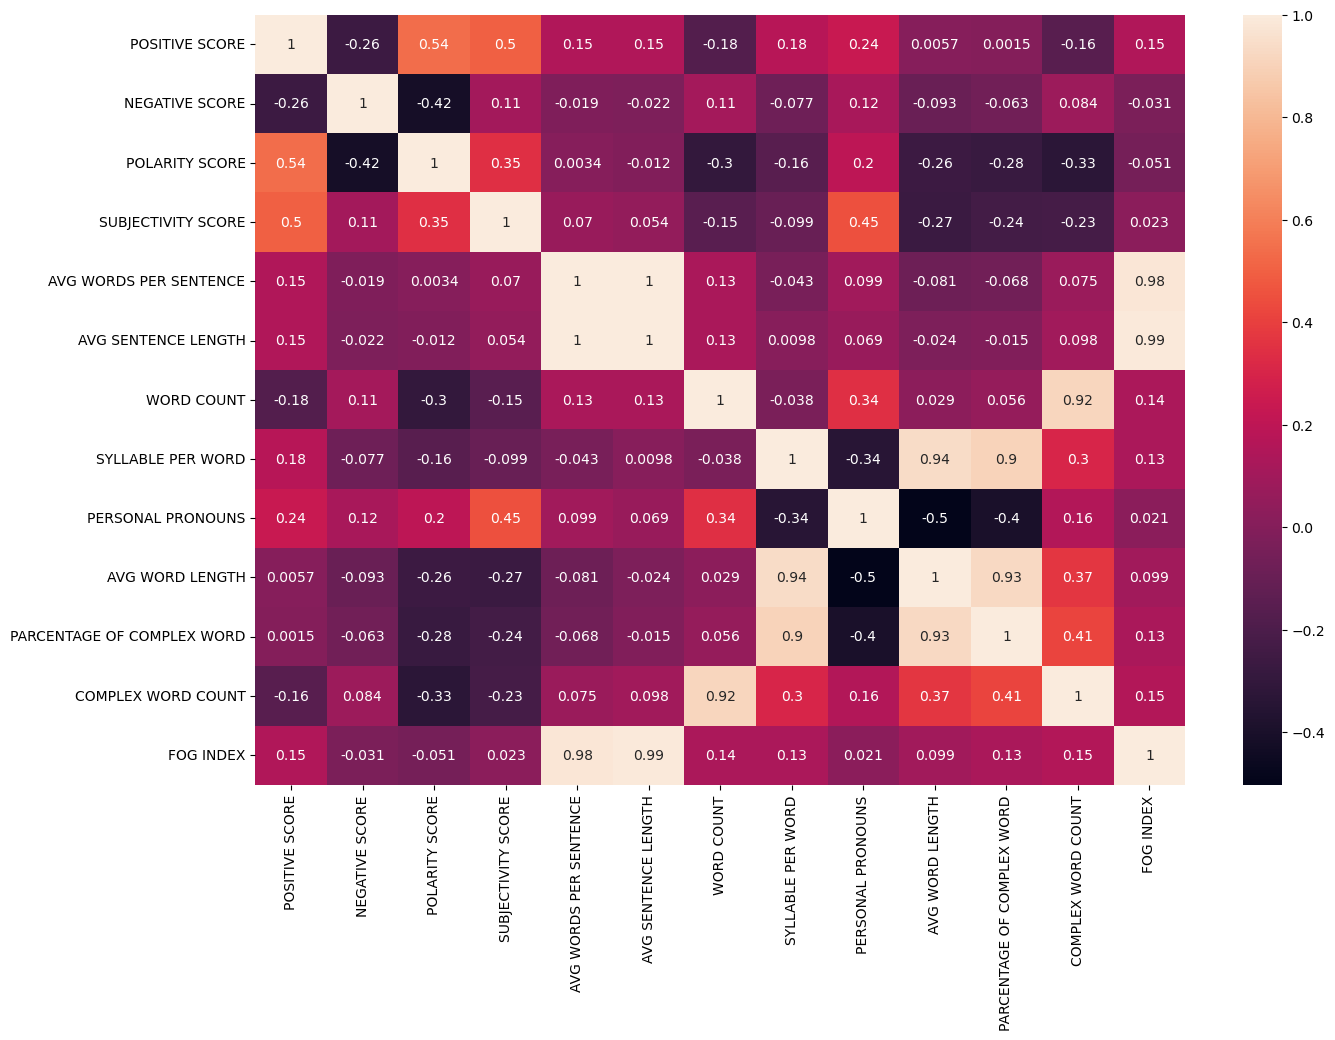

In [30]:
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,3:].corr(),annot=True)
plt.show()